This part of notebook deals with Data exploration


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

In [2]:
df = pd.read_csv('walmart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
df.Date

0       05-02-2010
1       12-02-2010
2       19-02-2010
3       26-02-2010
4       05-03-2010
           ...    
6430    28-09-2012
6431    05-10-2012
6432    12-10-2012
6433    19-10-2012
6434    26-10-2012
Name: Date, Length: 6435, dtype: object

In [4]:
df.Date=pd.to_datetime(df.Date)

df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year
df['weekday'].nunique()
df.drop(['Date'], axis=1, inplace=True)




In [5]:
y = df['Weekly_Sales']
x = df.drop(['Weekly_Sales'],axis=1)
x.describe(),y.describe()

(             Store  Holiday_Flag  Temperature   Fuel_Price          CPI  \
 count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000   
 mean     23.000000      0.069930    60.663782     3.358607   171.578394   
 std      12.988182      0.255049    18.444933     0.459020    39.356712   
 min       1.000000      0.000000    -2.060000     2.472000   126.064000   
 25%      12.000000      0.000000    47.460000     2.933000   131.735000   
 50%      23.000000      0.000000    62.670000     3.445000   182.616521   
 75%      34.000000      0.000000    74.940000     3.735000   212.743293   
 max      45.000000      1.000000   100.140000     4.468000   227.232807   
 
        Unemployment      weekday        month         year  
 count   6435.000000  6435.000000  6435.000000  6435.000000  
 mean       7.999151     3.573427     6.475524  2010.965035  
 std        1.875885     1.426581     3.321797     0.797019  
 min        3.879000     0.000000     1.000000  2010.000000  
 25%

<h3>EDA</h3>

<AxesSubplot:>

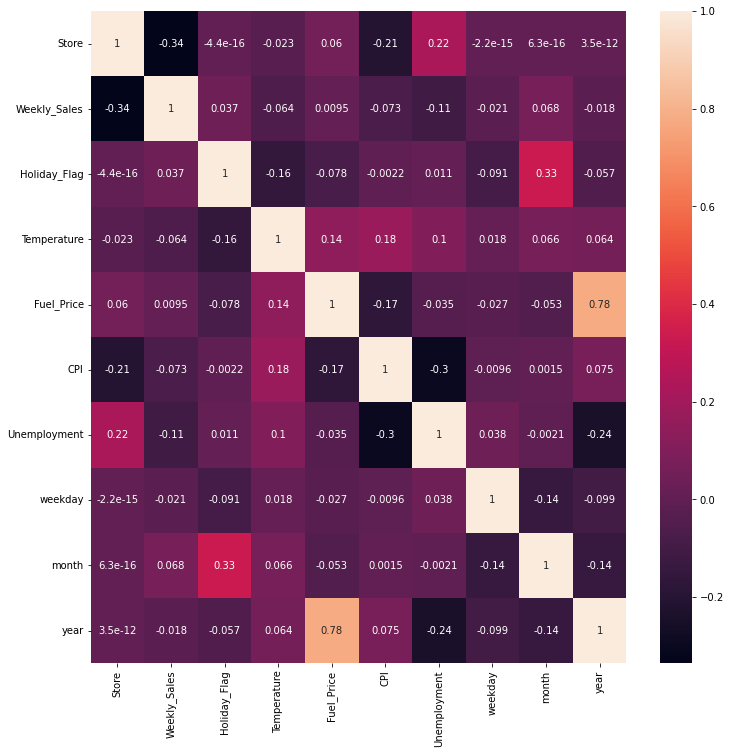

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x19764304040>,
 'caps': [<matplotlib.lines.Line2D at 0x197643046a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19764973d00>],
 'medians': [<matplotlib.lines.Line2D at 0x19764304b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x19764304e50>],
 'means': []}

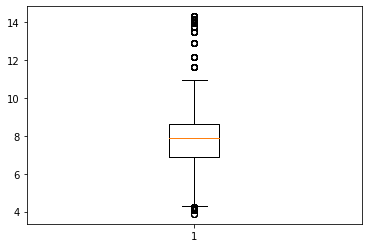

In [7]:
plt.boxplot(x['Unemployment'])

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

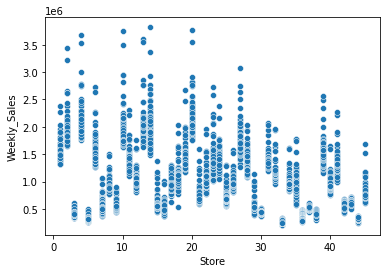

In [8]:
sns.scatterplot(x=df.Store,y=df.Weekly_Sales)

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score,KFold,learning_curve,validation_curve


<h3>KFold Validation to check accuracy</h3>

In [11]:
k = 7
kfold = KFold(n_splits=10)

<h2>Linear Regression</h2>

In [12]:
# linear = LinearRegression()
# linear.fit(x_train,y_train)
# linear_pred = linear.predict(x_train)
# linear_score_mae = mean_absolute_percentage_error(y_train,linear_pred)
# linear_score_cv = cross_val_score(linear,x_train,y_train,cv = kfold)
# print(linear_score_cv.mean())
# sns.scatterplot(x_train['Store'],y_train,color='r')
# sns.scatterplot(x_train['Store'],linear_pred)

<h2>Decision Tree</h2>

C:\Users\BHAVYA SHAH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BHAVYA SHAH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.9148574516231978,
 array([6.51258719e-01, 4.02747038e-03, 1.52758389e-02, 1.61739101e-02,
        1.63808586e-01, 1.28481539e-01, 4.89381227e-03, 1.59842063e-02,
        9.59180646e-05]))

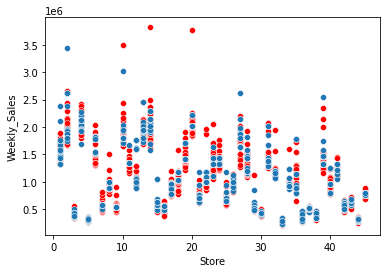

In [13]:
depth = [5,7,10,15,20] #i=10 is best
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x_train,y_train)
sns.scatterplot(x_test['Store'],y_test,color='r')
sns.scatterplot(x_test['Store'],tree.predict(x_test))
cross_val_score(tree,x_train,y_train,cv = kfold).mean(),tree.feature_importances_


<h2>Random Forest</h2>

C:\Users\BHAVYA SHAH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\BHAVYA SHAH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.9368226238363351

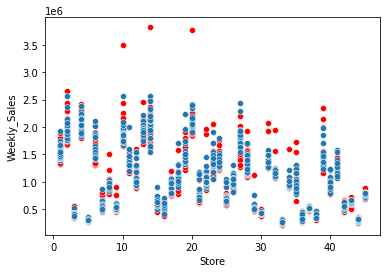

In [16]:

forest = RandomForestRegressor()
forest.fit(x_train,y_train)

# sns.scatterplot(x_train['Store'],y_train,color='r')
# sns.scatterplot(x_train['Store'],forest.predict(x_train))
sns.scatterplot(x_test['Store'],y_test,color='r')
sns.scatterplot(x_test['Store'],forest.predict(x_test))
(cross_val_score(forest,x_train,y_train,cv = kfold).mean())

<h2>Neural Network</h2>

In [15]:
# iter = [500,700,1000]
# score = []
# for i in iter:
#     nn = MLPRegressor(max_iter = i)
#     score.append(cross_val_score(nn,x_train,y_train,cv = kfold).mean())
# sns.lineplot(iter,score)
